## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE_NUM = [16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in itertools.product(BATCH_SIZE_NUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("BATCH_SIZE = %d" % (BATCH_SIZE))

    model = build_mlp(input_shape=x_train.shape[1:])

    #model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP[1])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE[0], 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "BATCH_SIZE = %s" % (str(BATCH_SIZE[0]))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

BATCH_SIZE = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512  

50000/50000 [==============================] - 25s 493us/step - loss: 1.1000 - acc: 0.6130 - val_loss: 1.4100 - val_acc: 0.5107
Epoch 50/50
50000/50000 [==============================] - 25s 506us/step - loss: 1.0850 - acc: 0.6168 - val_loss: 1.3231 - val_acc: 0.5404
BATCH_SIZE = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1

50000/50000 [==============================] - 13s 257us/step - loss: 0.8309 - acc: 0.7017 - val_loss: 1.6668 - val_acc: 0.4774
Epoch 48/50
50000/50000 [==============================] - 13s 260us/step - loss: 0.8210 - acc: 0.7070 - val_loss: 1.5447 - val_acc: 0.5122
Epoch 49/50
50000/50000 [==============================] - 14s 283us/step - loss: 0.8070 - acc: 0.7116 - val_loss: 1.7019 - val_acc: 0.4771
Epoch 50/50
50000/50000 [==============================] - 13s 258us/step - loss: 0.8035 - acc: 0.7142 - val_loss: 1.5493 - val_acc: 0.5056
BATCH_SIZE = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512

50000/50000 [==============================] - 5s 103us/step - loss: 0.2934 - acc: 0.8992 - val_loss: 2.3037 - val_acc: 0.4723
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.2858 - acc: 0.9013 - val_loss: 2.3441 - val_acc: 0.4714
Epoch 47/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.2663 - acc: 0.9111 - val_loss: 2.4354 - val_acc: 0.4665
Epoch 48/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.2590 - acc: 0.9121 - val_loss: 2.4643 - val_acc: 0.4712
Epoch 49/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.2562 - acc: 0.9139 - val_loss: 2.3856 - val_acc: 0.4828
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2627 - acc: 0.9100 - val_loss: 2.4660 - val_acc: 0.4643
BATCH_SIZE = 256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (N

50000/50000 [==============================] - 4s 71us/step - loss: 0.2566 - acc: 0.9237 - val_loss: 2.2286 - val_acc: 0.4774
Epoch 44/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.2427 - acc: 0.9284 - val_loss: 2.3196 - val_acc: 0.4677
Epoch 45/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.2317 - acc: 0.9319 - val_loss: 2.2414 - val_acc: 0.4798
Epoch 46/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.2122 - acc: 0.9401 - val_loss: 2.4098 - val_acc: 0.4753
Epoch 47/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.2030 - acc: 0.9430 - val_loss: 2.3311 - val_acc: 0.4769
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.1933 - acc: 0.9458 - val_loss: 2.3036 - val_acc: 0.4784
Epoch 49/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.1784 - acc: 0.9523 - val_loss: 2.5187 - val_acc: 0.4646
Epoch 50/50
50000/50000 [=====================

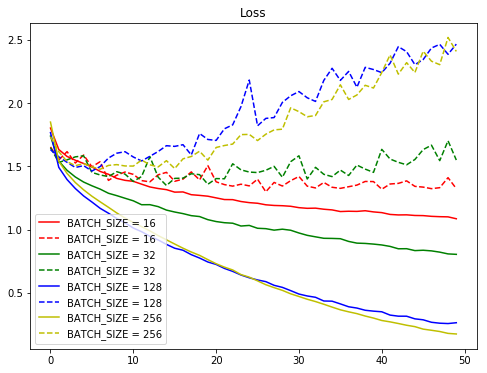

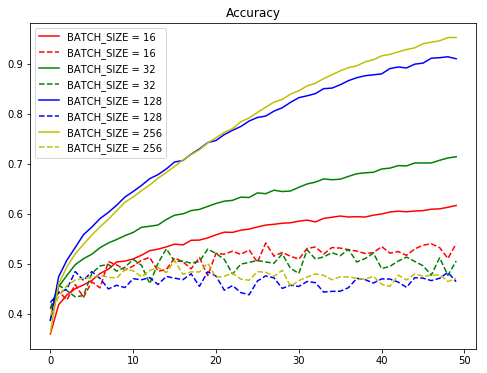

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()